In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import textwrap

In [2]:
# Loading the dataset
data = pd.read_csv('/Users/kamayanirai/Downloads/CVD_cleaned 2.csv')

In [3]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [6]:
#EDA

In [7]:
data.shape

(308854, 19)

In [8]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [10]:
data.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [15]:
data['Heart_Disease'].value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

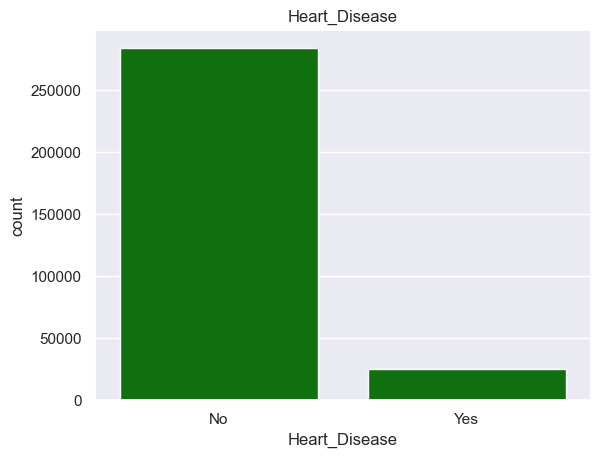

In [37]:
sns.countplot(x=data['Heart_Disease'],color='Green')
plt.title('Heart_Disease');

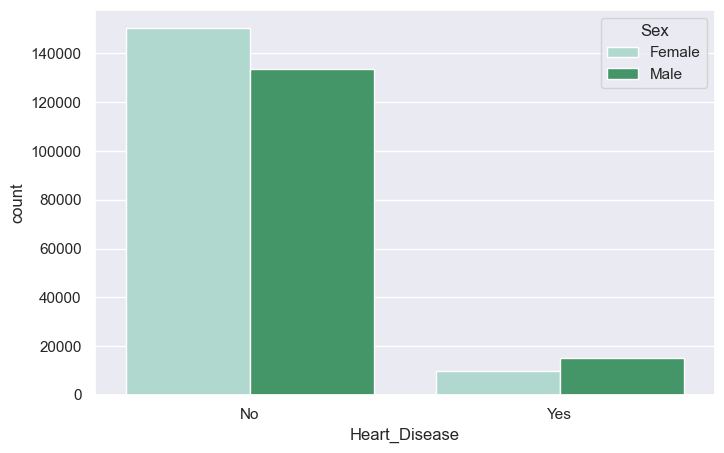

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Heart_Disease', palette="BuGn", hue='Sex')
plt.show()

array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

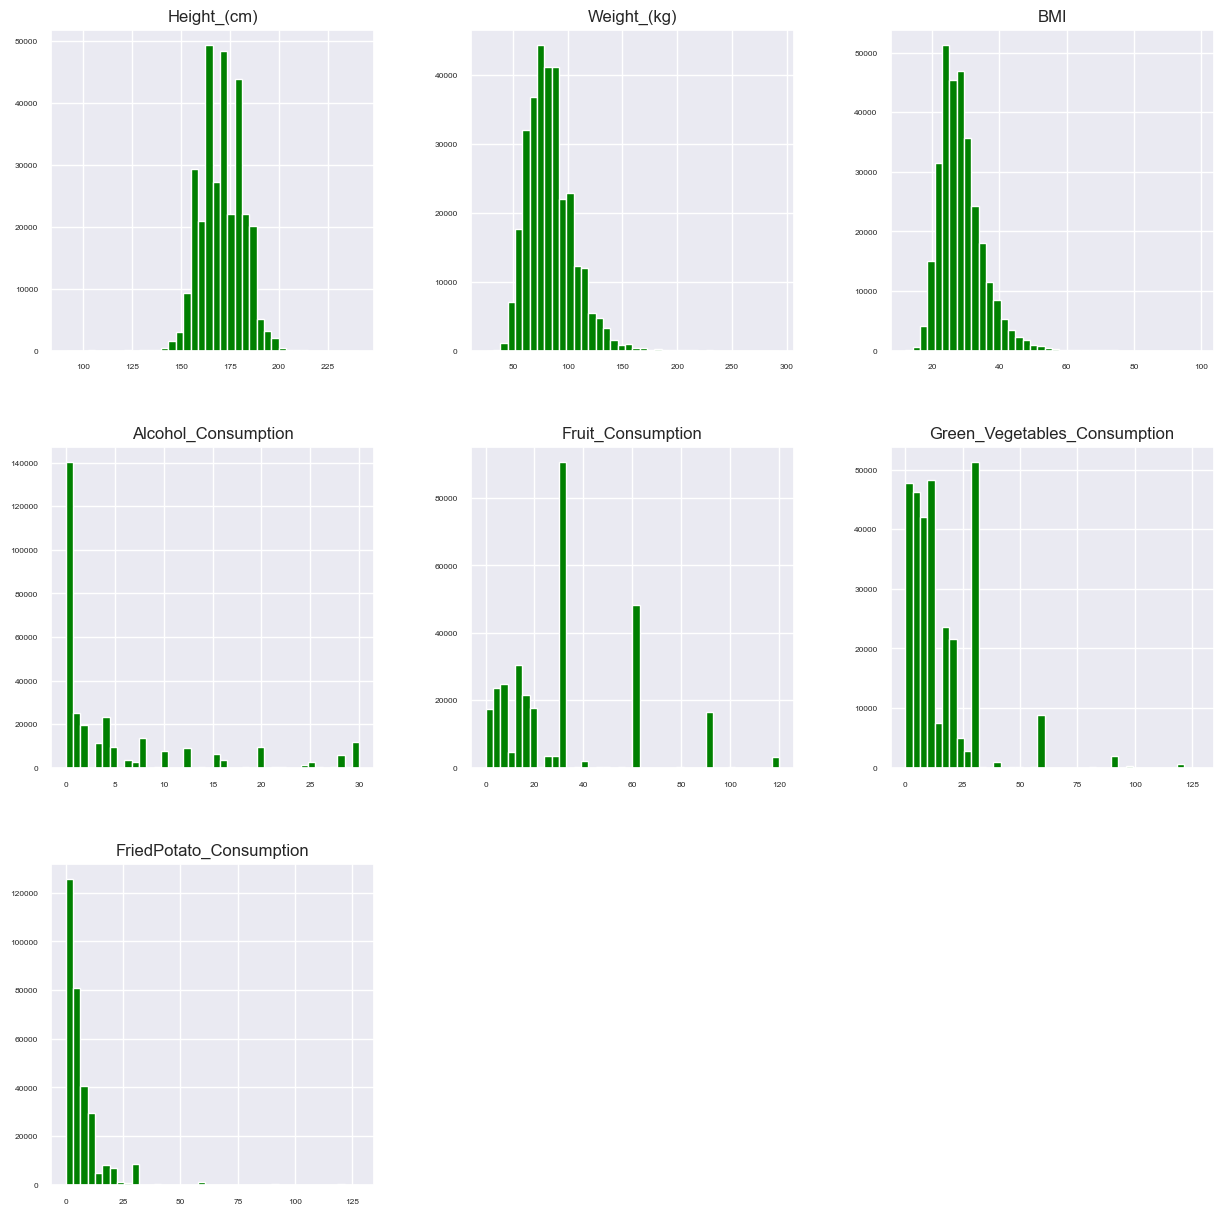

In [40]:
num_histogram = data.select_dtypes(include = ['float64', 'int64'])
num_histogram.hist(figsize=(15, 15), bins=40, xlabelsize=6, ylabelsize=6, color='Green')

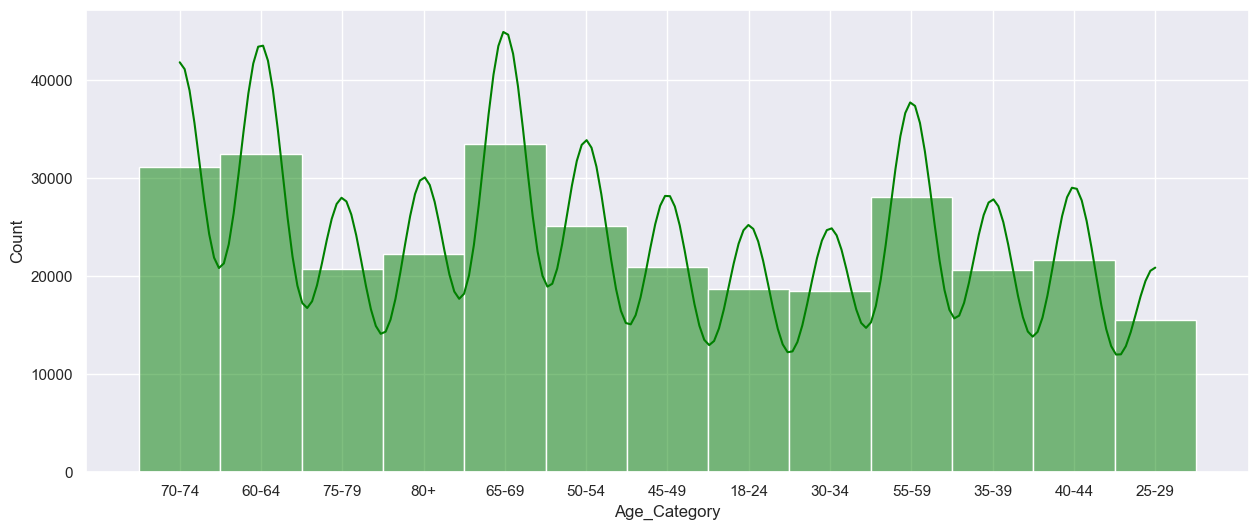

In [41]:
#distribution of age
plt.figure(figsize=(15, 6))
sns.set_theme()
sns.histplot(data=data, x="Age_Category", kde=True, color='Green') 
plt.show()

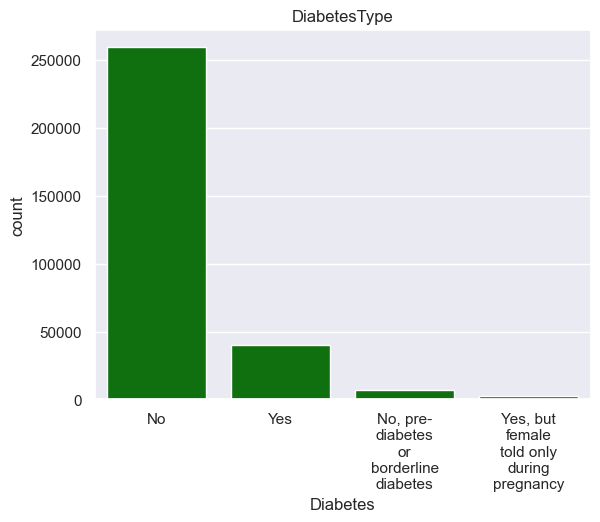

In [67]:
sns.countplot(x=data['Diabetes'],color='Green')
#plt.tight_layout()
#plt.xticks(rotation=45)
plt.xticks(range(len(data['Diabetes'].unique())), [textwrap.fill(label, 10) for label in data['Diabetes'].unique()])
plt.title('DiabetesType');

In [52]:
# Defining features and target variable
X = data.drop(columns='Heart_Disease')
Y = data['Heart_Disease']

In [55]:
# Converting categorical columns to numerical ones using LabelEncoder
categorical_columns = ['General_Health', 'Checkup', 'Exercise',
                       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes',
                       'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

label_encoder = LabelEncoder()

In [56]:
# Define a dictionary to map encoded values to original categorical values for my own reference
encoding_map = {}

for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])
    # Storing the mapping
    encoding_map[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Printing the encoding map
print("Encoding Map:")
for column, mapping in encoding_map.items():
    print(f"Mapping for {column}:")
    print(mapping)
    print()

Encoding Map:
Mapping for General_Health:
{'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very Good': 4}

Mapping for Checkup:
{'5 or more years ago': 0, 'Never': 1, 'Within the past 2 years': 2, 'Within the past 5 years': 3, 'Within the past year': 4}

Mapping for Exercise:
{'No': 0, 'Yes': 1}

Mapping for Skin_Cancer:
{'No': 0, 'Yes': 1}

Mapping for Other_Cancer:
{'No': 0, 'Yes': 1}

Mapping for Depression:
{'No': 0, 'Yes': 1}

Mapping for Diabetes:
{'No': 0, 'No, pre-diabetes or borderline diabetes': 1, 'Yes': 2, 'Yes, but female told only during pregnancy': 3}

Mapping for Arthritis:
{'No': 0, 'Yes': 1}

Mapping for Sex:
{'Female': 0, 'Male': 1}

Mapping for Age_Category:
{'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12}

Mapping for Smoking_History:
{'No': 0, 'Yes': 1}



In [57]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Initialize and train the Gradient Boosting classifier
model = GradientBoostingClassifier()
model.fit(X_train_scaled, Y_train_resampled)

GradientBoostingClassifier()

In [59]:
# Evaluate the model on training data
train_predictions = model.predict(X_train_scaled)
train_accuracy = accuracy_score(Y_train_resampled, train_predictions)
print('Accuracy on training data:', train_accuracy)

# Evaluate the model on testing data
test_predictions = model.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on testing data:', test_accuracy)

Accuracy on training data: 0.8766523121361831
Accuracy on testing data: 0.833190332032831


In [60]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_test_scaled, Y_test, cv=kf)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.91687576 0.92075441 0.9209163  0.92026874 0.91573579]
Mean Cross-Validation Score: 0.9189102011371408


In [61]:
# Classification report
report = classification_report(Y_test, test_predictions)
print(report)

              precision    recall  f1-score   support

          No       0.94      0.87      0.91     56777
         Yes       0.22      0.42      0.29      4994

    accuracy                           0.83     61771
   macro avg       0.58      0.65      0.60     61771
weighted avg       0.89      0.83      0.86     61771



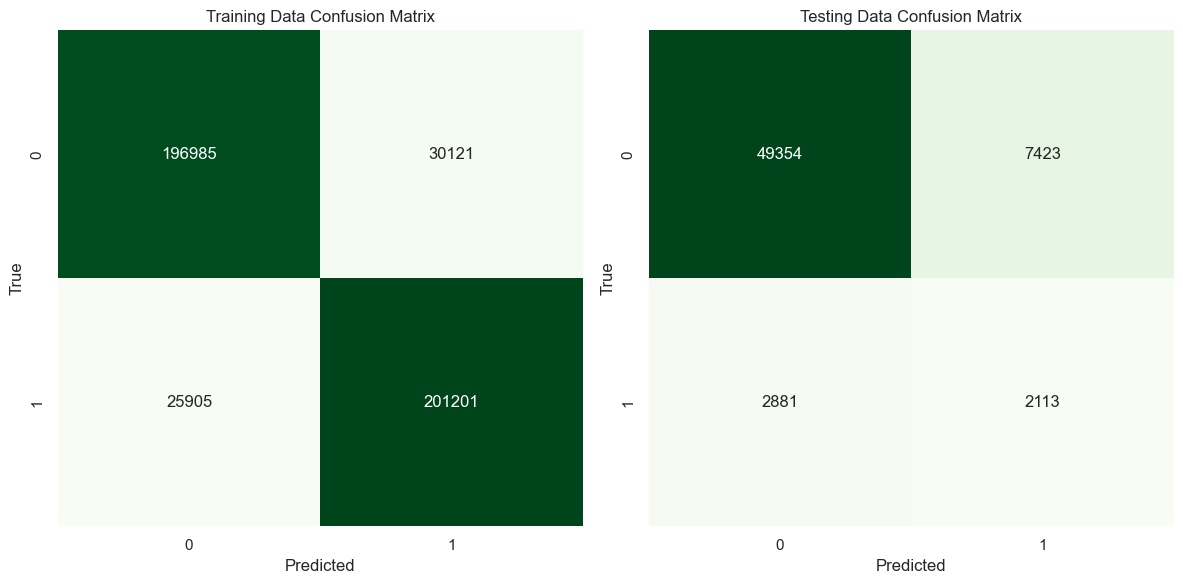

In [80]:
#confusion matrices
train_cm = confusion_matrix(Y_train_resampled, train_predictions)
test_cm = confusion_matrix(Y_test, test_predictions)

#  confusion matrices using  heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('Training Data Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('Testing Data Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [65]:
# Example input data for prediction
input_data = 4, 4, 0, 0, 0, 0, 1, 0, 0, 10, 165, 77.11, 28.29, 0, 0.0, 30.0, 0.0, 4.0

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if prediction[0] == 'No':
    print('The person is not at heart disease risk')
elif prediction[0] == 'Yes':
    print('The person is at heart disease risk')
else:
    print('Unknown prediction')

The person is not at heart disease risk


In [66]:
prediction = model.predict(input_data_reshaped)
print("Prediction:", prediction)


Prediction: ['No']


In [53]:
filename = 'Cvd_prediction.sav'
pickle.dump(model, open(filename, 'wb' ))
loaded_model = pickle.load(open('Cvd_prediction.sav','rb'))